## Magnetopause Plot

This example generates a plot of the magnetopause locations using either the `mpause_2` or the `mpause_t96` function from the `pyspedas.utilities` module.
The plot includes grid, labels, and title. The x-axis is inverted to match the IDL behavior if necessary.

This is similar to the IDL code `crib_magnetopause`. 

The following line installs pyspedas, so this notebook can be used in Google Colab.  If you're running in an environment where pyspedas is already installed, you can comment out or skip this command.

In [1]:
!pip install pyspedas


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


### Part 1: Magnetopause plot, using mpause_2

In [2]:
import matplotlib.pyplot as plt
import pyspedas
from pyspedas.utilities.mpause_2 import mpause_2

Call the mpause_2 function without parameters to use default values.

In [3]:
xmp, ymp = mpause_2()

Set the range for the axes.

In [4]:
x_limits = (-300, 100)
y_limits = (-100, 100)

Create the plot.

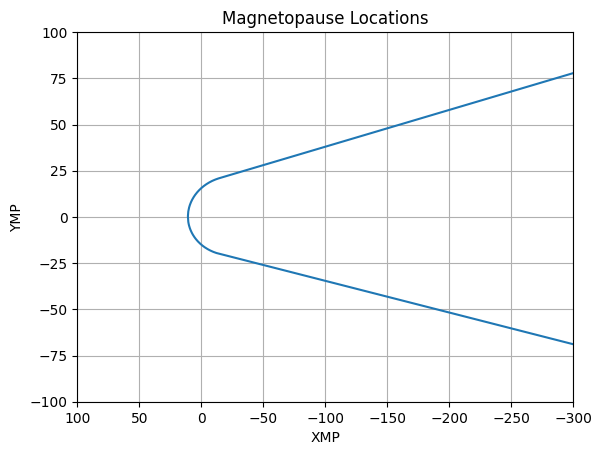

In [5]:
plt.figure()
plt.plot(xmp, ymp)

# Set the limits of x and y axes
plt.xlim(x_limits)
plt.ylim(y_limits)

# Invert the x-axis to match the IDL behavior if necessary
plt.gca().invert_xaxis()

# Add grid, labels, and title if desired
plt.grid(True)
plt.xlabel("XMP")
plt.ylabel("YMP")
plt.title("Magnetopause Locations")

# Display the plot
plt.show()

### Part 2: Magnetopause plot, using mpause_t96

In [6]:
from pyspedas.themis import state
from pyspedas.cotrans.cotrans import cotrans
from pyspedas.utilities.mpause_t96 import mpause_t96
import matplotlib.pyplot as plt
from pytplot import get_data

Set the date and load one day of position data from THEMIS thd probe. 
The position is in GEI coordinate system, transform it to GSM using the function cotrans.
Convert the GSM position from kilometers to Earth radii units.

In [7]:

date_start = '2019-01-05/00:00:00'
date_end = '2019-01-06/00:00:00'

state(trange=[date_start, date_end], probe='d', get_support_data=True)

cotrans(name_in='thd_pos', name_out='thd_pos_gsm', coord_in='gei', coord_out='gsm')

pos_gsm_data = get_data('thd_pos_gsm')

re = 6378.0
pos_gsm = pos_gsm_data.y / re

18-Feb-24 11:04:49: Downloading http://themis.ssl.berkeley.edu/data/themis/thd/l1/state/2019/thd_l1_state_20190105.cdf to themis_data/thd/l1/state/2019/thd_l1_state_20190105.cdf
18-Feb-24 11:04:49: Download complete: themis_data/thd/l1/state/2019/thd_l1_state_20190105.cdf
18-Feb-24 11:04:50: Creating spin model for probe d correction level 0
18-Feb-24 11:04:50: spin_correction variable not available, defaulting to 0.0
18-Feb-24 11:04:50: FGM correction variables not available
18-Feb-24 11:04:50: Skipping FGM corrections, do_fgm_corr False, correction_level = 0
18-Feb-24 11:04:50: Creating spin model for probe d correction level 1
18-Feb-24 11:04:50: spin_correction variable not available, defaulting to 0.0
18-Feb-24 11:04:50: FGM correction variables not available
18-Feb-24 11:04:50: Skipping FGM corrections, do_fgm_corr False, correction_level = 1
18-Feb-24 11:04:50: Creating spin model for probe d correction level 2
18-Feb-24 11:04:50: spin_correction variable not available, defaulti

Set a value for the solar wind dynamic pressure.
Call the mpause_t96 function with the position data.

In [8]:
dynp = 2.0

xmgnp, ymgnp, zmgnp, id, distan = mpause_t96(
        pd=dynp, xgsm=pos_gsm[:, 0], ygsm=pos_gsm[:, 1], zgsm=pos_gsm[:, 2])

Plot the magnetopause. 
  

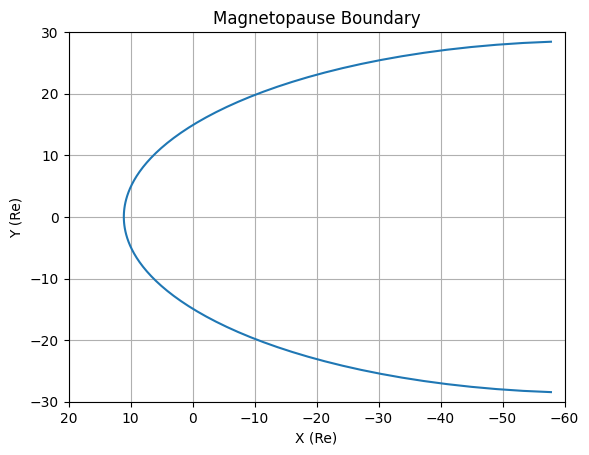

In [9]:
plt.figure()
plt.plot(xmgnp, ymgnp)
plt.xlim(20, -60)
plt.ylim(-30, 30)
plt.xlabel('X (Re)')
plt.ylabel('Y (Re)')
plt.title('Magnetopause Boundary')
plt.grid(True)
plt.show()